In [1]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
from collections import Counter
import joblib as jl
import pickle
from wordcloud import WordCloud

from textblob import TextBlob
from afinn import Afinn

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import bigrams
from nltk import ngrams
from nltk.probability import FreqDist
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /home/arg/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/arg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/arg/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/arg/nltk_data...


True

In [3]:
stop_words = set(stopwords.words('english'))

In [4]:
data = pd.read_csv("./e2/GrammarandProductReviews.csv")
data

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71039,AVzRGDlw-jtxr-f3yfFH,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",2017-06-22T18:37:24Z,2018-02-05T11:28:36Z,"3,006,503,610,570,300,000,000,000,000,000,000,...",optifreepuremoistdisinfectingsolution10floz/b0...,Opti-Free,11014438,Opti-Free Puremoist Disinfecting Solution 10fl Oz,...,6855681.0,6.0,5,https://www.walmart.com/reviews/product/10294231,I'm dealing with dry eyes and very sensitive t...,Solves the problem,NaN,NaN,Seniorgal,"300650361040,631113253665,300650193108,3006503..."
71040,AVzRGDlw-jtxr-f3yfFH,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",2017-06-22T18:37:24Z,2018-02-05T11:28:36Z,"3,006,503,610,570,300,000,000,000,000,000,000,...",optifreepuremoistdisinfectingsolution10floz/b0...,Opti-Free,11014438,Opti-Free Puremoist Disinfecting Solution 10fl Oz,...,71102868.0,1.0,5,https://www.walmart.com/reviews/product/10294231,Great stuff! Helps keep my contacts moist all ...,Great stuff!,NaN,NaN,Nammaw,"300650361040,631113253665,300650193108,3006503..."
71041,AVzRGDlw-jtxr-f3yfFH,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",2017-06-22T18:37:24Z,2018-02-05T11:28:36Z,"3,006,503,610,570,300,000,000,000,000,000,000,...",optifreepuremoistdisinfectingsolution10floz/b0...,Opti-Free,11014438,Opti-Free Puremoist Disinfecting Solution 10fl Oz,...,58039428.0,0.0,5,https://www.walmart.com/reviews/product/10294231,Right price,My review,NaN,NaN,LDBoston,"300650361040,631113253665,300650193108,3006503..."
71042,AVzvTLfivKc47QAVfPme,Bebe Au Lait,"Baby,Nursing & Feeding,Breastfeeding,Nursing C...",2017-06-28T15:23:21Z,2018-02-05T10:19:41Z,8.78982E+11,"878982005883,bebeaulait/50032623,08789820

In [5]:
data["reviews.text"].describe()

count     71008
unique    64913
top        Good
freq         26
Name: reviews.text, dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71044 entries, 0 to 71043
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    71044 non-null  object 
 1   brand                 71044 non-null  object 
 2   categories            71044 non-null  object 
 3   dateAdded             71044 non-null  object 
 4   dateUpdated           71044 non-null  object 
 5   ean                   39065 non-null  object 
 6   keys                  71044 non-null  object 
 7   manufacturer          70903 non-null  object 
 8   manufacturerNumber    70841 non-null  object 
 9   name                  71044 non-null  object 
 10  reviews.date          70977 non-null  object 
 11  reviews.dateAdded     71044 non-null  object 
 12  reviews.dateSeen      71044 non-null  object 
 13  reviews.didPurchase   32158 non-null  object 
 14  reviews.doRecommend   60429 non-null  object 
 15  reviews.id         

In [7]:
def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    
    # Eliminar URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Eliminar caracteres especiales y dígitos
    text = re.sub(r'\@\w+|\#|\d+', '', text)
    
    # Eliminar signos de puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenizar palabras
    tokens = word_tokenize(text)
    
    # Eliminar stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in tokens if word not in stop_words]
    
    return ' '.join(filtered_words)

# Aplicar la función a la columna reviews.text
data['cleaned_reviews'] = data['reviews.text'].apply(lambda x: preprocess_text(x) if isinstance(x, str) else x)

# Palabra más repetida:

In [8]:
from collections import Counter

# Unir todas las reseñas en un solo string
all_reviews = ' '.join(data['cleaned_reviews'].dropna())

# Contar las palabras más frecuentes
word_counts = Counter(all_reviews.split())
most_common_words = word_counts.most_common(10)
print("Palabras más comunes:", most_common_words)


Palabras más comunes: [('great', 20946), ('product', 20272), ('movie', 19738), ('review', 18907), ('part', 18666), ('promotion', 17734), ('collected', 17726), ('love', 16899), ('use', 15953), ('good', 12202)]


# Nube de palabras:

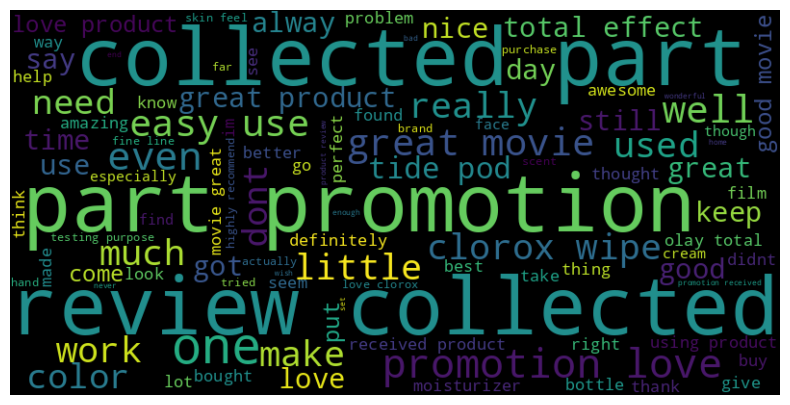

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, max_words=100).generate(all_reviews)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Histograma de las palabras más repetidas:

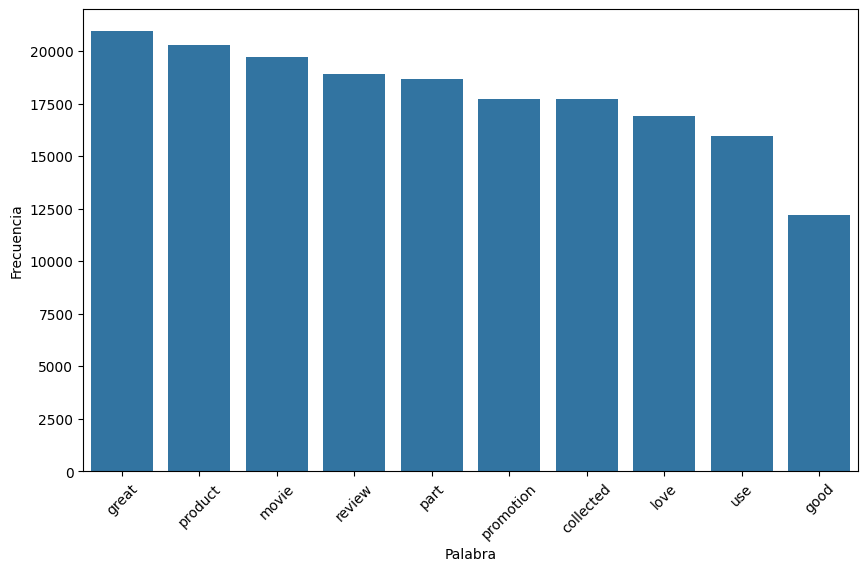

In [10]:
import seaborn as sns

# Preparar los datos para el histograma
common_words_df = pd.DataFrame(most_common_words, columns=['Palabra', 'Frecuencia'])

# Plotear
plt.figure(figsize=(10, 6))
sns.barplot(x='Palabra', y='Frecuencia', data=common_words_df)
plt.xticks(rotation=45)
plt.show()


 # Análisis de sentimientos:

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Inicializar el analizador de sentimientos
sid = SentimentIntensityAnalyzer()

# Función para clasificar las reseñas
def sentiment_analysis(text):
    scores = sid.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Aplicar la función a las reseñas
data['sentiment'] = data['cleaned_reviews'].apply(lambda x: sentiment_analysis(x) if isinstance(x, str) else 'neutral')

# Contar las reseñas positivas, negativas y neutrales
print(data['sentiment'].value_counts())


sentiment
positive    63451
negative     4345
neutral      3248
Name: count, dtype: int64


# Determinar productos y usuarios clave:

### Top 10 productos de mejor calidad:

In [12]:
top_products = data[data['sentiment'] == 'positive'].groupby('name').size().nlargest(10)
print(top_products)


name
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                         7829
The Secret Life Of Pets (4k/uhd + Blu-Ray + Digital)                              5263
Independence Day Resurgence (4k/uhd + Blu-Ray + Digital)                          3188
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                   2979
Tide Original Liquid Laundry Detergent - 100 Oz                                   2920
Olay Total Effects Daily Moisturizer, 7-In-1 Anti-Aging, 0.5oz                    2584
The Jungle Book (blu-Ray/dvd + Digital)                                           2355
L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz    2202
L'oreal Paris Revitalift Triple Power Deep-Acting Moisturizer                     2101
Clorox Disinfecting Bathroom Cleaner                                              1927
dtype: int64


### Top 10 productos de peor calidad:

In [13]:
worst_products = data[data['sentiment'] == 'negative'].groupby('name').size().nlargest(10)
print(worst_products)


name
Rubbermaid174 Reveal Spray Mop                                     447
Tide Original Liquid Laundry Detergent - 100 Oz                    421
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total          308
Independence Day Resurgence (4k/uhd + Blu-Ray + Digital)           281
Nexxus Exxtra Gel Style Creation Sculptor                          224
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd    201
Olay Total Effects Daily Moisturizer, 7-In-1 Anti-Aging, 0.5oz     134
Sausage Party (4k/uhd + Digital)                                   115
The Resident Evil Collection 5 Discs (blu-Ray)                     105
The Secret Life Of Pets (4k/uhd + Blu-Ray + Digital)                98
dtype: int64


### Usuarios con más reseñas:

In [14]:
top_users = data.groupby('reviews.username').size().nlargest(10)
print(top_users)


reviews.username
An anonymous customer    421
Anonymous                113
Mike                     105
Chris                     88
ByAmazon Customer         58
Dave                      57
John                      49
Rick                      41
James                     32
Robert                    31
dtype: int64


### Usuarios con más reseñas negativas/positivas:

In [15]:
positive_users = data[data['sentiment'] == 'positive'].groupby('reviews.username').size().nlargest(10)
negative_users = data[data['sentiment'] == 'negative'].groupby('reviews.username').size().nlargest(10)
print("Usuarios con más reseñas positivas:", positive_users)
print("Usuarios con más reseñas negativas:", negative_users)


Usuarios con más reseñas positivas: reviews.username
An anonymous customer    366
Mike                     100
Anonymous                 91
Chris                     79
Dave                      54
John                      44
ByAmazon Customer         41
Rick                      34
James                     28
Robert                    28
dtype: int64
Usuarios con más reseñas negativas: reviews.username
An anonymous customer    34
ByAmazon Customer        16
Anonymous                 7
Chris                     4
Cool                      4
Lisa                      4
Mike                      4
Bobcat                    3
Disappointed              3
Johnny                    3
dtype: int64


# 6.1. Cuáles son los 10 productos de mejor calidad dado su reseña

In [16]:
# Filtrar las reseñas positivas
positive_reviews = data[data['sentiment'] == 'positive']

# Agrupar por el nombre del producto y contar cuántas reseñas positivas tiene cada uno
top_quality_products = positive_reviews.groupby('name').size().nlargest(10)

# Mostrar los 10 productos con más reseñas positivas
print("Productos de mejor calidad:")
print(top_quality_products)


Productos de mejor calidad:
name
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                         7829
The Secret Life Of Pets (4k/uhd + Blu-Ray + Digital)                              5263
Independence Day Resurgence (4k/uhd + Blu-Ray + Digital)                          3188
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                   2979
Tide Original Liquid Laundry Detergent - 100 Oz                                   2920
Olay Total Effects Daily Moisturizer, 7-In-1 Anti-Aging, 0.5oz                    2584
The Jungle Book (blu-Ray/dvd + Digital)                                           2355
L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz    2202
L'oreal Paris Revitalift Triple Power Deep-Acting Moisturizer                     2101
Clorox Disinfecting Bathroom Cleaner                                              1927
dtype: int64


# 6.2. Cuáles son los 10 productos de menor calidad dado su reseña

In [17]:
# Filtrar las reseñas negativas
negative_reviews = data[data['sentiment'] == 'negative']

# Agrupar por el nombre del producto y contar cuántas reseñas negativas tiene cada uno
worst_quality_products = negative_reviews.groupby('name').size().nlargest(10)

# Mostrar los 10 productos con más reseñas negativas
print("Productos de menor calidad:")
print(worst_quality_products)


Productos de menor calidad:
name
Rubbermaid174 Reveal Spray Mop                                     447
Tide Original Liquid Laundry Detergent - 100 Oz                    421
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total          308
Independence Day Resurgence (4k/uhd + Blu-Ray + Digital)           281
Nexxus Exxtra Gel Style Creation Sculptor                          224
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd    201
Olay Total Effects Daily Moisturizer, 7-In-1 Anti-Aging, 0.5oz     134
Sausage Party (4k/uhd + Digital)                                   115
The Resident Evil Collection 5 Discs (blu-Ray)                     105
The Secret Life Of Pets (4k/uhd + Blu-Ray + Digital)                98
dtype: int64


# 6.3. Cuáles son los usuarios que dan la mayor cantidad de reseñas a distintos productos

In [18]:
# Agrupar por nombre de usuario y contar la cantidad de reseñas
most_active_users = data.groupby('reviews.username').size().nlargest(10)

# Mostrar los 10 usuarios con más reseñas
print("Usuarios con más reseñas:")
print(most_active_users)


Usuarios con más reseñas:
reviews.username
An anonymous customer    421
Anonymous                113
Mike                     105
Chris                     88
ByAmazon Customer         58
Dave                      57
John                      49
Rick                      41
James                     32
Robert                    31
dtype: int64


# 6.4. Cuáles son los usuarios que más reseñas negativas y positivas dan en promedio

In [19]:
# Filtrar las reseñas positivas y negativas
positive_reviews = data[data['sentiment'] == 'positive']
negative_reviews = data[data['sentiment'] == 'negative']

# Agrupar por nombre de usuario para las reseñas positivas
most_positive_users = positive_reviews.groupby('reviews.username').size().nlargest(10)

# Agrupar por nombre de usuario para las reseñas negativas
most_negative_users = negative_reviews.groupby('reviews.username').size().nlargest(10)

# Mostrar los 10 usuarios con más reseñas positivas y negativas
print("Usuarios con más reseñas positivas:")
print(most_positive_users)

print("Usuarios con más reseñas negativas:")
print(most_negative_users)


Usuarios con más reseñas positivas:
reviews.username
An anonymous customer    366
Mike                     100
Anonymous                 91
Chris                     79
Dave                      54
John                      44
ByAmazon Customer         41
Rick                      34
James                     28
Robert                    28
dtype: int64
Usuarios con más reseñas negativas:
reviews.username
An anonymous customer    34
ByAmazon Customer        16
Anonymous                 7
Chris                     4
Cool                      4
Lisa                      4
Mike                      4
Bobcat                    3
Disappointed              3
Johnny                    3
dtype: int64


# 6.5. Cuáles son los productores que tienen productos de mejor calidad

In [20]:
# Agrupar reseñas positivas por fabricante y contar la cantidad de reseñas positivas por cada uno
top_quality_producers = positive_reviews.groupby('manufacturer').size().nlargest(10)

# Mostrar los 10 productores con más productos de mejor calidad
print("Productores con productos de mejor calidad:")
print(top_quality_producers)


Productores con productos de mejor calidad:
manufacturer
Clorox                           7830
Universal                        5897
Twentieth Century Fox            3880
Test                             2979
Procter & Gamble                 2925
PROCTER & GAMBLE COMPANY, THE    2584
Buena Vista                      2355
L'oreal Paris                    2287
L'Oreal Paris                    2101
AmazonUs/CLOO7                   1927
dtype: int64


# 6.6. Cuáles son los productores que tienen productos de peor calidad

In [21]:
# Agrupar reseñas negativas por fabricante y contar la cantidad de reseñas negativas por cada uno
worst_quality_producers = negative_reviews.groupby('manufacturer').size().nlargest(10)

# Mostrar los 10 productores con más productos de peor calidad
print("Productores con productos de peor calidad:")
print(worst_quality_producers)


Productores con productos de peor calidad:
manufacturer
Rubbermaid                       447
Procter & Gamble                 421
Twentieth Century Fox            321
Clorox                           308
Nexxus Beauty Products           224
Test                             201
PROCTER & GAMBLE COMPANY, THE    134
Universal                        119
Sony Pictures                    115
SONY CORP                        105
dtype: int64
